In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.svm import SVC

# SVM
Skeleton
- Learning Curve
- Hyperparameter Tuning + Validation Curve + Wall Clock

# Titanic

## Get train and test

In [17]:
from functions import preprocess_titanic, SEED, generate_learning_curve, generate_validation_curve

In [4]:
from sklearn.metrics import roc_auc_score

In [5]:
X_train, X_test, y_train, y_test = preprocess_titanic()

## Baseline Learning Curve

In [6]:
estimator = SVC(random_state=SEED, probability=True,decision_function_shape="ovo")

train roc auc:  0.7653299623686868
test roc auc: 0.7027667984189724


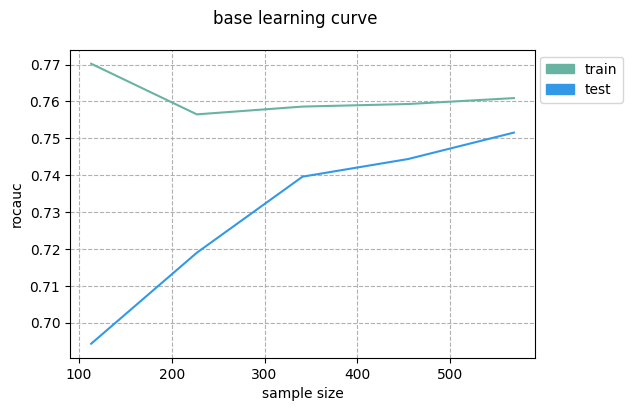

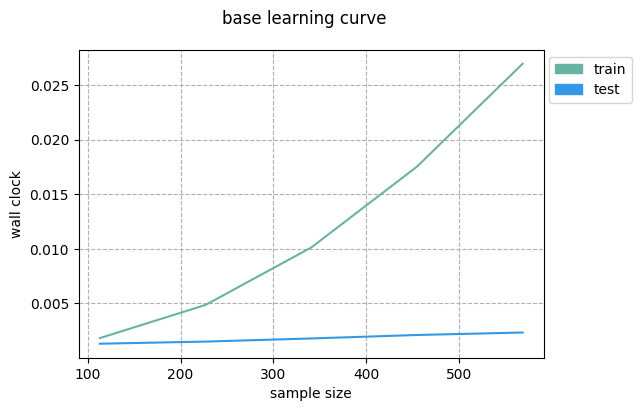

In [7]:
generate_learning_curve(estimator, X_train, y_train, X_test, y_test, "sample size", "base learning curve", "roc_auc")

## Validation Curve

### Kernel

In [8]:
params = ["linear", "poly", "rbf", "sigmoid"]
estimators = []
for param in params:
    estimator = SVC(random_state=SEED, kernel=param, probability=True,decision_function_shape="ovo")
    estimators.append(estimator)

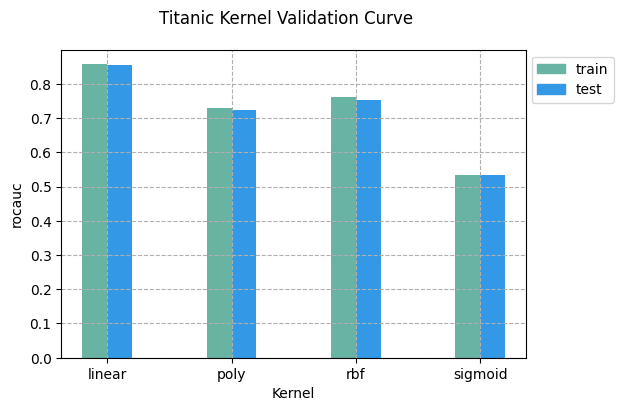

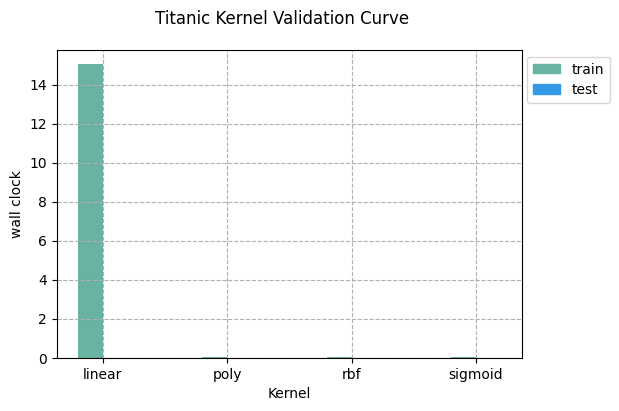

In [9]:
generate_validation_curve(estimators, params, X_train, y_train, X_test, y_test, "Kernel", "Titanic Kernel Validation Curve",'bar',"roc_auc")

### Kernel (Poly) - Degree

In [10]:
params = [1,2,3,4,5,6,7,8,9,10]
estimators = []
for param in params:
    estimator = SVC(random_state=SEED, kernel="poly", degree=param, probability=True,decision_function_shape="ovo")
    estimators.append(estimator)

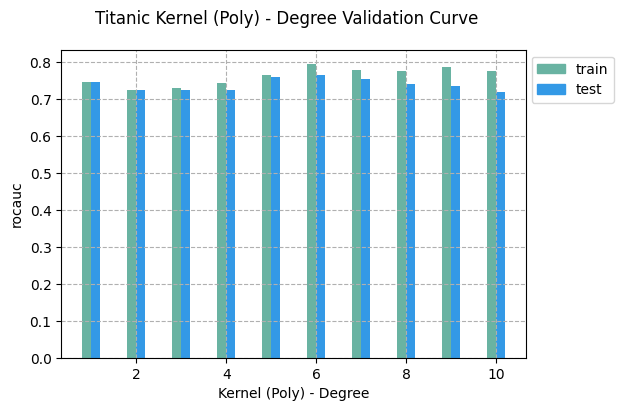

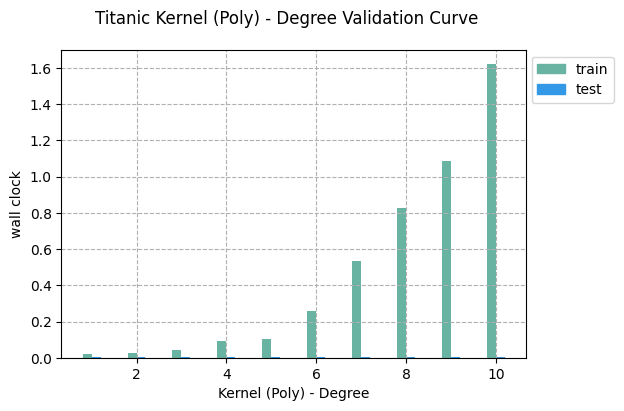

In [11]:
generate_validation_curve(estimators, params, X_train, y_train, X_test, y_test, "Kernel (Poly) - Degree", "Titanic Kernel (Poly) - Degree Validation Curve",'bar',"roc_auc")

### Kernel (rbf) - gamma

In [19]:
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
estimators = []
for param in params:
    estimator = SVC(random_state=SEED, kernel="rbf", gamma=param, probability=True,decision_function_shape="ovo")
    estimators.append(estimator)

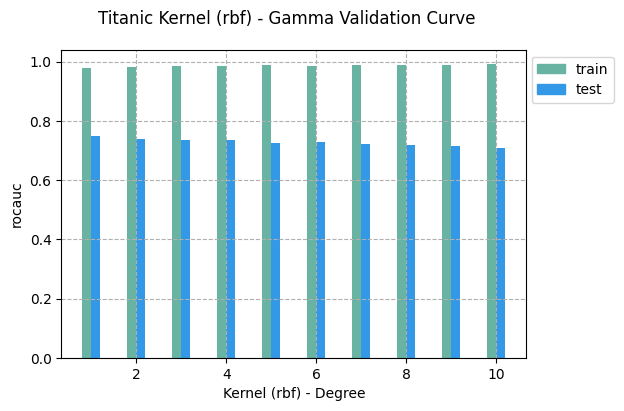

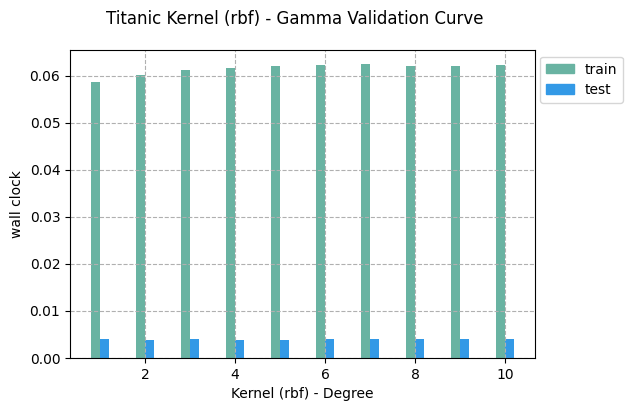

In [20]:
generate_validation_curve(estimators, params, X_train, y_train, X_test, y_test, "Kernel (rbf) - Degree", "Titanic Kernel (rbf) - Gamma Validation Curve",'bar',"roc_auc")

In [14]:
from functions import trigger_validate

### Kernel Linear

train wall clock: 14.956142902374268
test wall clock: 0.0017662525177001953
train roc auc:  0.8552696354518677
test roc auc: 0.830961791831357


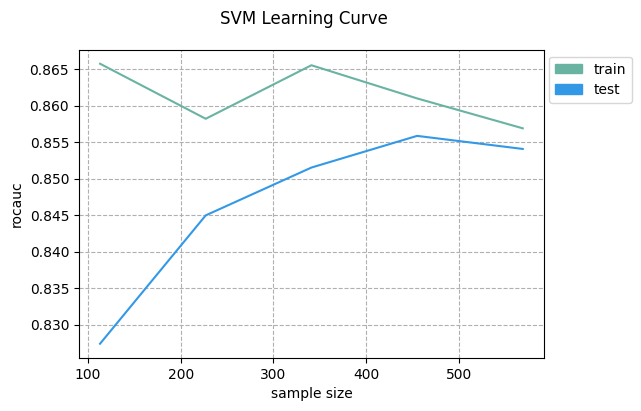

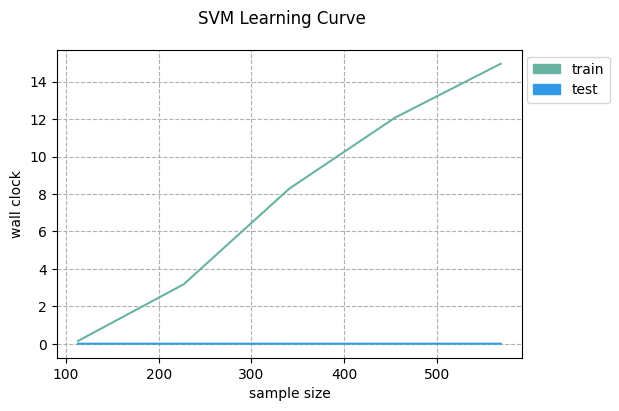

In [18]:
estimator = SVC(random_state=SEED, kernel="linear", probability=True,decision_function_shape="ovo")
estimator.fit(X_train, y_train)
generate_learning_curve(estimator, X_train, y_train, X_test, y_test, "sample size", "SVM Learning Curve", "roc_auc")